# Part 3

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib as mplib
import matplotlib.pyplot as plt
import seaborn as sns
import PandaSurvey
import weightedcalcs as wc

/Users/Ariel/Desktop/NYU/Summer 2021/Policy and Data Studio/Repos/Ariel_Medex/env/lib/python3.9/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('003usa_00003.csv')

# Weighting the Medicaid Total Survey Population 

In [4]:
df['HINSCAID1'] = df['HINSCAID']/2 # Having Medicaid is coded as 2 in the survey, standardizing for population weighting
df

,Unnamed: 0,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,CPI99,STATEICP,COUNTYICP,...,YRSUSA2,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY,ADJINC,HINSCAID1
0,0,2009,200901,816419,89,150.0,2009008164191,0.777,13,810,...,5,2,1,2,1,10,3800.0,33,2952.6,1.0
1,1,2009,200901,816422,147,213.0,2009008164221,0.777,13,470,...,2,1,1,2,1,10,15000.0,93,11655.0,1.0
2,2,2009,200901,816422,147,213.0,2009008164221,0.777,13,470,...,2,1,1,2,3,30,0.0,93,0.0,1.0
3,3,2009,200901,816422,147,213.0,2009008164221,0.777,13,470,...,2,1,1,2,0,0,0.0,93,0.0,1.0
4,5,2009,200901,816465,717,85.0,2009008164651,0.777,13,810,...,3,1,1,2,3,30,0.0,114,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173719,237138,2019,201901,923317,2019001412249,56.0,2019009233171,0.652,13,610,...,5,1,1,2,3,30,13300.0,101,8671.6,1.0
173720,237140,2019,201901,923323,2019001412338,161.0,2019009233231,0.652,13,470,...,5,1,1,2,3,30,8800.0,72,5737.6,1.0
173721,237141,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,470,...,0,1,1,2,3,30,16200.0,53,10562.4,1.0
173722,237142,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,470,...,0,1,1,2,3,30,0.0,53,0.0,1.0


In [5]:
df['HINSCAIDWT'] = df['HINSCAID1']*df['PERWT']
df

,Unnamed: 0,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,CPI99,STATEICP,COUNTYICP,...,HINSEMP,HINSPUR,HINSCAID,EMPSTAT,EMPSTATD,INCTOT,POVERTY,ADJINC,HINSCAID1,HINSCAIDWT
0,0,2009,200901,816419,89,150.0,2009008164191,0.777,13,810,...,2,1,2,1,10,3800.0,33,2952.6,1.0,149.0
1,1,2009,200901,816422,147,213.0,2009008164221,0.777,13,470,...,1,1,2,1,10,15000.0,93,11655.0,1.0,212.0
2,2,2009,200901,816422,147,213.0,2009008164221,0.777,13,470,...,1,1,2,3,30,0.0,93,0.0,1.0,185.0
3,3,2009,200901,816422,147,213.0,2009008164221,0.777,13,470,...,1,1,2,0,0,0.0,93,0.0,1.0,200.0
4,5,2009,200901,816465,717,85.0,2009008164651,0.777,13,810,...,1,1,2,3,30,0.0,114,0.0,1.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173719,237138,2019,201901,923317,2019001412249,56.0,2019009233171,0.652,13,610,...,1,1,2,3,30,13300.0,101,8671.6,1.0,56.0
173720,237140,2019,201901,923323,2019001412338,161.0,2019009233231,0.652,13,470,...,1,1,2,3,30,8800.0,72,5737.6,1.0,161.0
173721,237141,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,470,...,1,1,2,3,30,16200.0,53,10562.4,1.0,72.0
173722,237142,2019,201901,923328,2019001412405,72.0,2019009233281,0.652,13,470,...,1,1,2,3,30,0.0,53,0.0,1.0,62.0


In [6]:
year_wt = df.groupby(['YEAR'], as_index=False).sum('HINSCAIDWT')

# Setting Plot Theme

In [7]:
sns.set_theme(context='notebook', style='white', font='Helvetica Neue', font_scale=1)

## Plotting Weighted Medicaid Population in NYC 2009-2019

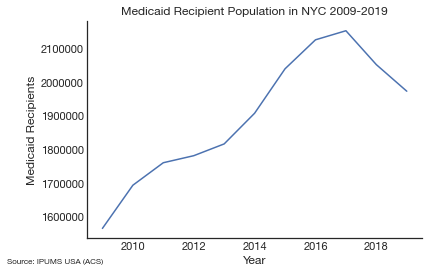

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
mc = sns.lineplot(x='YEAR', y='HINSCAIDWT', data=year_wt)
sns.despine()
mc.set(xlabel='Year', ylabel='Medicaid Recipients', title='Medicaid Recipient Population in NYC 2009-2019')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.annotate('Source: IPUMS USA (ACS)', (0,0), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.savefig('NYC Medicaid Population 2009-2019.png', bbox_inches='tight')

# For Loop to Weight and Plot Survey Variables

## Data Cleaning 

Recoding column values for easier plotting

In [17]:
df["EMPSTAT"].replace({0: "N/A", 1: "Employed", 2: "Unemployed", 3: "Not In Labor Forace"}, inplace=True)
df['COUNTYICP'].replace({50: 'Bronx', 470: 'Brooklyn', 610: 'Manhattan', 810: 
                         'Queens', 850:'Staten Island'}, inplace=True)
df['RACE'].replace({1: 'White', 2: 'Black', 3: 'American Indian or Alaskan Native', 
                    4: 'Chinese', 5: 'Japanese', 6: 'Other Asian or Pacific Islander', 
                    7: 'Other Race', 8: 'Two major races', 9: 'Three or more major races'}, inplace=True)
df['SEX'].replace({1: 'Male', 2: 'Female'}, inplace=True)
df['CITIZEN'].replace({0: 'US Citizen', 1: 'Born Abroad of Natural Parents', 
                       2: 'Naturalized Citizen', 3: 'Not a Citizen'}, inplace=True)
df['HISPAN'].replace({0: 'Not Hispanic', 1: 'Mexican', 2: 'Puerto Rican', 
                      3: 'Cuban', 4: 'Other', 9: 'Not Reported'}, inplace=True)
df['HINSPUR'].replace({1: 'Insurance not Purchased Directly from Marketplace', 2: 'Insurance Purchased Directly from Marketplace'}, inplace=True)

Creating a dictionary to rename columns for plotting

In [18]:
dictionary = {'EMPSTAT': 'Employment Status', 'RACE': 'Race', 
              'CITIZEN': 'Citizenship Status', 'SEX': 'Sex', 'COUNTYICP': 'Borough', 
              'HINSPUR': 'Purchased Marketplace Insurance', 'HISPAN': 'Hispanic Origin'}

## Plotting Medicaid Population by Attribute

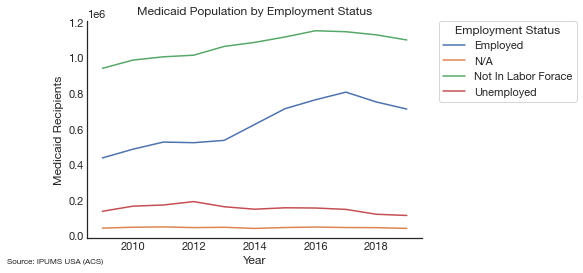

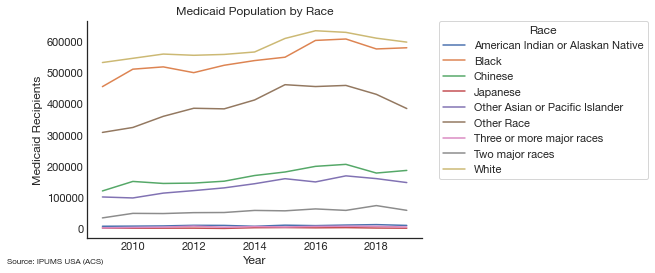

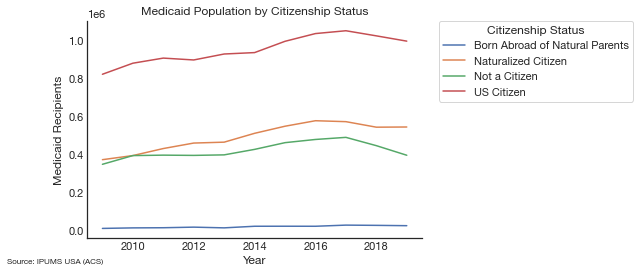

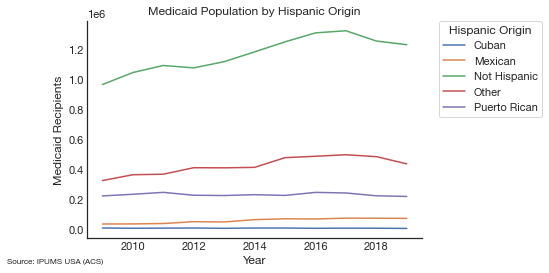

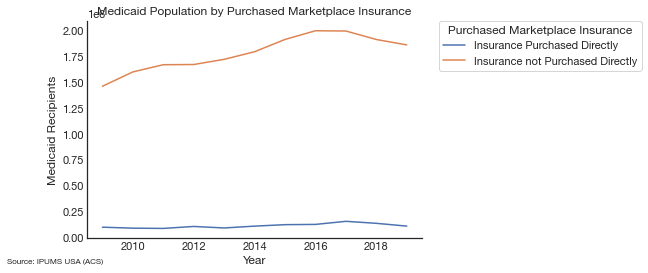

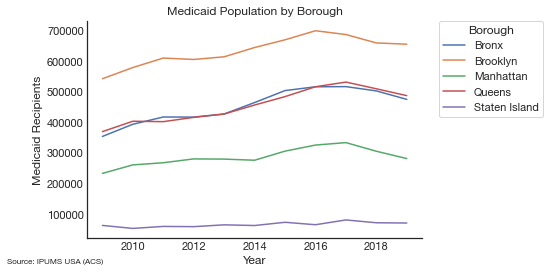

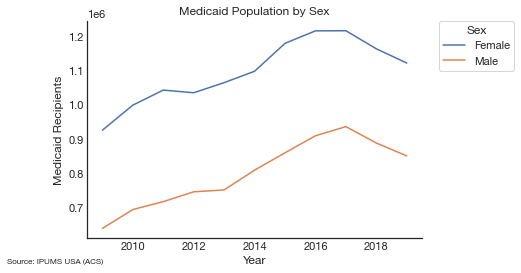

In [20]:
#list for loop
list_plot_var = ['EMPSTAT', 'RACE', 'CITIZEN', 'HISPAN', 'HINSPUR', 'COUNTYICP', 'SEX']

for this_var in list_plot_var:
    this_var_df = df.groupby(['YEAR', this_var], as_index=False).sum()[['YEAR', this_var, 'PERWT']]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    y = sns.lineplot(x='YEAR', y='PERWT', hue=this_var, data=this_var_df)
    sns.despine()
    y.set(xlabel='Year', ylabel='Medicaid Recipients', title='Medicaid Population by ' + dictionary[this_var])
    ax.tick_params(axis=u'both', which=u'both',length=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=dictionary[this_var])
    plt.annotate('Source: IPUMS USA (ACS)', (0,0), (-80,-20), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points', va='top')
    plt.savefig(f'plot_{this_var}.png', bbox_inches='tight')